## Machine Learning - Ex.2

Submitted by: [Osnat Haj Yahia]


In [426]:
%matplotlib inline
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt

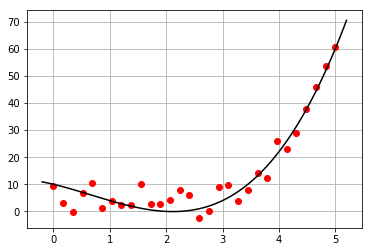

In [427]:
# generate the training data:

N = 30

# generate N sample points 
x = np.linspace(0,5,N) 
y = x**3 -2*x**2 -5*x + 10
sigma = 4
y += np.random.randn(N)*sigma # add gaussian noise (with sigma = 4)


# generate 100 points to visualize the true polynomial 
xx = np.linspace(-0.2,5.2,100) 
yy = xx**3 -2*xx**2 -5*xx + 10


plt.plot(x,y,'or',xx,yy,'-k')
plt.grid()
plt.show()

### Design Matrix

In this exercise we will fit to the data a polynomial model of degree $d$,

$$ f(x;w) = w_0 + w_1 x + w_2 x^2 + ... + w_d x^d $$

As a first step, write a function that generates a $N\times(d+1)$ design-matrix from the data $\{x_i\}_{i=1}^N$, where the $j$-th coloumn ($j=0,1,...,d)$ contains the values of $(x_i)^j$.


In [428]:
# your code here..

### Generate the design-matrix ....
def design_matrix(x, d):
    design_matrix_x = np.zeros((N, d+1))
    for i in range(N):
        for j in range(d+1):
            design_matrix_x[i][j] = x[i] ** j
    return design_matrix_x
    
    

d = 3
X = design_matrix(x, d)

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.72413793e-01   2.97265161e-02   5.12526139e-03]
 [  1.00000000e+00   3.44827586e-01   1.18906064e-01   4.10020911e-02]
 [  1.00000000e+00   5.17241379e-01   2.67538644e-01   1.38382057e-01]
 [  1.00000000e+00   6.89655172e-01   4.75624257e-01   3.28016729e-01]
 [  1.00000000e+00   8.62068966e-01   7.43162901e-01   6.40657674e-01]
 [  1.00000000e+00   1.03448276e+00   1.07015458e+00   1.10705646e+00]
 [  1.00000000e+00   1.20689655e+00   1.45659929e+00   1.75796466e+00]
 [  1.00000000e+00   1.37931034e+00   1.90249703e+00   2.62413383e+00]
 [  1.00000000e+00   1.55172414e+00   2.40784780e+00   3.73631555e+00]
 [  1.00000000e+00   1.72413793e+00   2.97265161e+00   5.12526139e+00]
 [  1.00000000e+00   1.89655172e+00   3.59690844e+00   6.82172291e+00]
 [  1.00000000e+00   2.06896552e+00   4.28061831e+00   8.85645168e+00]
 [  1.00000000e+00   2.24137931e+00   5.02378121e+00   1.12601993e+01]
 [  1.

### Gradient Descent

Implement a Gradient-Descent algorithm to find the optimal weights $(w_0,w_1,...,w_d)$.

The algorithm should get the $N\times (d+1)$ design matrix $X$ containing all the features and an $N$-vector of the corresponding $y$ values.

Use your algorithm to fit a *cubic* model to the data:

$$ f(x;w)=w_0 + w_1 x + w_2 x^2 + w_3 x^3 $$

Verify that the algorithm has indeed converged (if not - change the number of iterations or the learning rate).

Finally, plot the sample points $\{(x_i,y_i)\}_{i=1}^N$ together with the fitted model line $y=f(x;w)$.

Compare to the *true* parameters that were used to generate the data.

[ 5.82621217  2.29109329 -4.59294169  1.26227515]


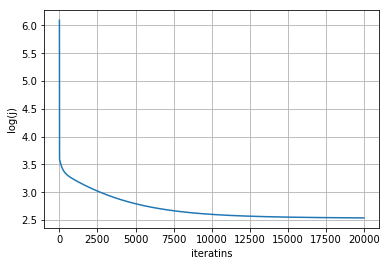

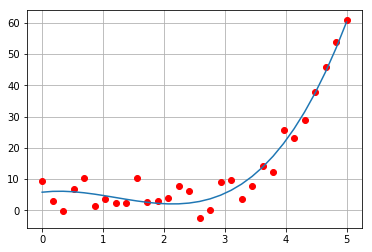

In [429]:
# your code here..

def gradient_descent (X, y, alpha, num_of_iteration):
    j = np.zeros(num_of_iteration) # to hold the cost function value J at each iteration
    N,d = np.shape(X)
    w = np.zeros(d)
    
    # your code here..    
    x_transpose = X.transpose()
    for i in range(num_of_iteration ):
        errors = np.dot(X,w) - y         
        gradient = np.dot(x_transpose , errors)    
        w = w - alpha * 2/N * gradient
        j[i] = 1/N * np.sum(errors **2)
        
    return w, j



# fit the model to the data:
alpha = 0.0003
num_of_iteration =20000
w, j = gradient_descent(X, y, alpha, num_of_iteration)
print(w)

f1 =  w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3 

plt.plot(np.log(j))
plt.xlabel("iteratins")
plt.ylabel("log(j)")
plt.grid()
plt.show()

plt.plot(x,y,'or' ,x , f1)
plt.grid()
plt.show()

### Regression closed form solution

Now, instead of using the Gradient-Descent algorithm, we will use the closed form solution:

$$ w^{*} = C^{-1}u$$

where, 

$$ C = X^\top X\ \ ,\ \ u=X^\top y$$


Fit a *cubic* model to the data, and compare to the Gradient-Descent's results. 

[ 3.95143078  6.76626601 -6.71187025  1.53112482]


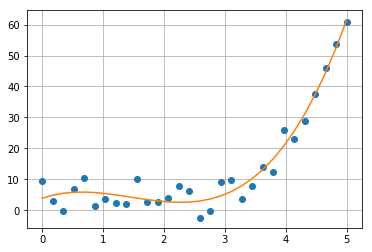

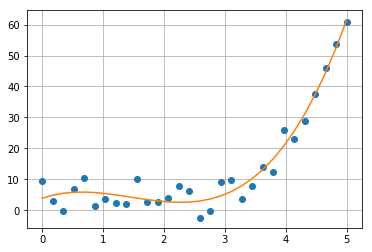

In [430]:
# your code here..

def linear_regression (X , y):
    # your code here..
    d = np.shape(X)
    w = np.zeros(d)
    
    x_transpose = X.transpose()
    c = np.dot(x_transpose , X)
    u = np.dot(x_transpose , y)
    inverse_matrix = inv(c)
    w = np.dot(inverse_matrix , u)    
    return w

def plot_grid(x, y, f):
    plt.plot(x,y , 'o' , x ,f)
    plt.grid()
    plt.show()

# fit the model to the data:
# your code here..
w = linear_regression(X, y)
print(w)
f2 =  w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3 
plot_grid(x, y, f2)

### Over-fitting 

In this section, we will try to fit different models to the data:

1. $ f(x;w)=w_0 + w_1 x  $

2. $ f(x;w)=w_0 + w_1 x + w_2 x^2 + w_3 x^3 $

3. $ f(x;w)=w_0 + w_1 x + w_2 x^2 + ... + w_5 x^5 $

4. $ f(x;w)=w_0 + w_1 x + w_2 x^2 + ... + w_7 x^7 $

This time, we will use fewer data points ($N=16$) and further divide them into: 8 training points ('red') and 8 testing points ('blue'). 

You will use *only* the training points when fitting the models. 

When plotting the results, plot both testing and training points (in different colors) and the fitted model line $y=f(x;w)$.



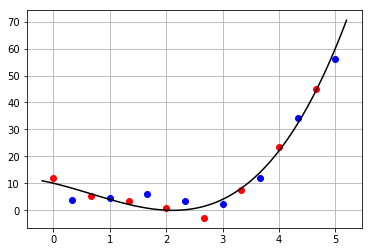

In [435]:
N = 16

# generate N sample points 
sigma = 4
x = np.linspace(0,5,N) 
y = x**3 -2*x**2 -5*x + 10
y += np.random.randn(N)*sigma # add gaussian noise (with sigma = 4)


# generate 100 points to visualize the true polynomial 
xx = np.linspace(-0.2,5.2,100) 
yy = xx**3 -2*xx**2 -5*xx + 10

x_trn = x[::2] # 0,2,4,6,...
y_trn = y[::2]

x_tst = x[1::2] # 1,3,5,7,...
y_tst = y[1::2]

plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'ob',xx,yy,'-k')
plt.grid()
plt.show()

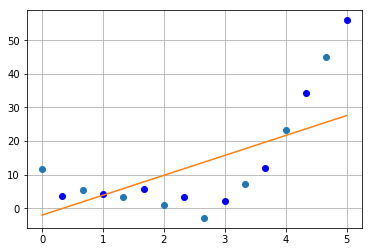

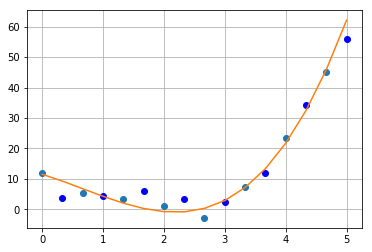

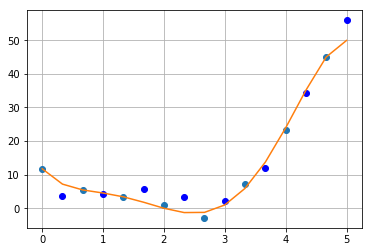

In [436]:
# your code here..

def plot(x_trn, y_trn, x_tst, y_tst, x ,f ):
    plt.plot(x_trn,y_trn , 'o' , x_tst,y_tst,'ob', x ,f)
    plt.grid()
    plt.show()

#1 -degree
d =1 
N = 8
X = design_matrix(x_trn , d)
w = linear_regression(X, y_trn)
f6 =  w[0] + w[1] * x
plot(x_trn,y_trn ,x_tst,y_tst, x, f6)


#3-degree
d=3
X = design_matrix(x_trn , d)
w = linear_regression(X, y_trn)
f3 =  w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3 
plot(x_trn,y_trn ,x_tst,y_tst, x, f3)



#5-degree
d = 5
X = design_matrix(x_trn , d)
w = linear_regression(X, y_trn)
f4 =  w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3 +w[4] * x**4 +w[5] * x**5
plot(x_trn,y_trn ,x_tst,y_tst, x, f4)